In [1]:
#Import data and libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  LSTM
from tensorflow.keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

In [3]:
# Have a look at our data

In [4]:
data = pd.read_excel('../raw_data/daily_data_clean.xlsx', engine='openpyxl').drop(columns='Unnamed: 0')

In [5]:
data.head()

,date_issue,total_amount_claims
0,2018-09-01,168
1,2018-09-02,346
2,2018-09-03,16169
3,2018-09-04,28529
4,2018-09-05,64135


In [6]:
# The value to predict is the column total_amount_claims. Let's define "y" and have a look at its trend

In [7]:
# length of data frame

In [8]:
len_data = len(data)
len_data

920

In [9]:
# Select feature to predict

In [10]:
y = data['total_amount_claims']
y.head()

0      168
1      346
2    16169
3    28529
4    64135
Name: total_amount_claims, dtype: int64

In [11]:
# Convert feature to array

In [12]:
y = np.array(y)

In [13]:
y.shape

(920,)

In [14]:
y = y.reshape(-1,1)

In [15]:
y.shape

(920, 1)

In [16]:
# Plot y

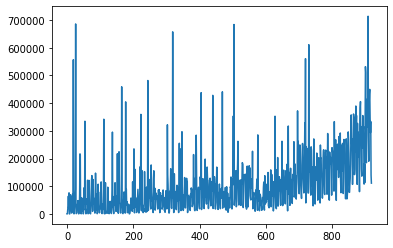

In [17]:
plt.plot(y);

In [18]:
# We will use shifted versions of the column Y as independent variables, that is to say use 3 delays of Y
# as inputs to predict the output of our data.

In [19]:
X1 = y[0:len_data-3,:]
X2 = y[1:len_data-2,:]
X3 = y[2:len_data-1,:]
y = y[3:len_data,:]


In [20]:
X1.size

917

In [21]:
X2.size

917

In [22]:
X3.size

917

In [23]:
y.size

917

In [24]:
X = np.concatenate([X1,X2,X3],axis=1)

In [25]:
X

array([[   168,    346,  16169],
       [   346,  16169,  28529],
       [ 16169,  28529,  64135],
       ...,
       [449803, 350720, 293427],
       [350720, 293427, 333658],
       [293427, 333658, 139824]])

In [26]:
print(f'X shape is {X.shape}')
print(f'Y shape is {y.shape}')

X shape is (917, 3)
Y shape is (917, 1)


In [27]:
# we standardize our data both our variable x and our variable y between 0 and 1

In [28]:
# LSTM needs 3 dimensional input so we have to reshape the X input into 3 dimensions.

In [29]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler.fit(y)
y = scaler.transform(y)

X= np.reshape(X, (X.shape[0],1,X.shape[1]))

In [30]:
X.shape

(917, 1, 3)

In [31]:
X

array([[[1.91910886e-04, 4.41254957e-04, 2.26062619e-02]],

       [[4.41254957e-04, 2.26062619e-02, 3.99202659e-02]],

       [[2.26062619e-02, 3.99202659e-02, 8.97974850e-02]],

       ...,

       [[6.30044840e-01, 4.91248443e-01, 4.10991871e-01]],

       [[4.91248443e-01, 4.10991871e-01, 4.67347834e-01]],

       [[4.10991871e-01, 4.67347834e-01, 1.95823347e-01]]])

In [32]:
# Define training and test sets for our model

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [34]:
print(f'X train size:{X_train.shape}')
print(f'X test size:{X_test.shape}')
print(f'y train size:{y_train.shape}')
print(f'y test size:{y_test.shape}')

X train size:(733, 1, 3)
X test size:(184, 1, 3)
y train size:(733, 1)
y test size:(184, 1)


In [35]:
# model building

In [36]:
model = Sequential()
model.add(LSTM(units= 10,activation = 'tanh',input_shape = (1,3),recurrent_activation= 'hard_sigmoid')) #DUDA: APLICAR RETURN SEQUENCES O NO?

In [37]:
# output layer

In [38]:
model.add(Dense(1))

In [39]:
# We use mean absolute error to assess our model and then we fit our model to the training set and launch the prediction

In [68]:
model.compile(loss= 'mean_squared_error',optimizer = 'rmsprop', metrics=['mae'])
model.fit(X_train,y_train,epochs=100,verbose=1)


Epoch 1/100
23/23 [==============================] - 2s 3ms/step - loss: 0.0149 - mae: 0.0810
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0151 - mae: 0.0828
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0139 - mae: 0.0802
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0186 - mae: 0.0878
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0169 - mae: 0.0862
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0165 - mae: 0.0853
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0138 - mae: 0.0806
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0149 - mae: 0.0786
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0160 - mae: 0.0827
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0155 - mae: 0.0814
Epoch 11/100
23/23 [==============================] - 0s 3m

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                560       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [61]:
model_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Mean Absolute Error {model_mae[1]:.4f}')

Model Mean Absolute Error 0.0874


In [62]:
Predict = model.predict(X_test)

In [ ]:
# Let’s now have a visualization comparing the prediction versus the test set to see how our model performed

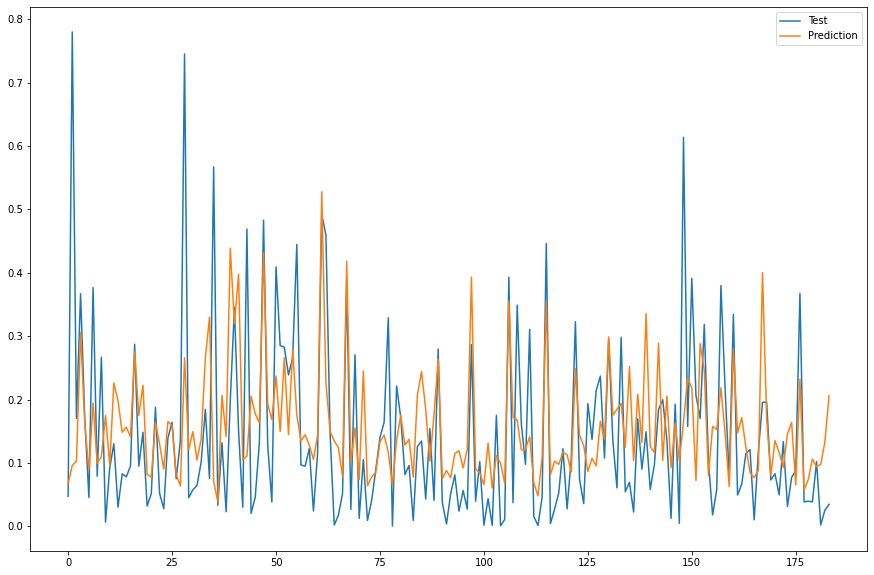

In [63]:
plt.figure(figsize=(15,10))
plt.plot(y_test,label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
# Let’s now add time indexes and scale back to the original scale

In [67]:
# y_train = scaler.inverse_transform(y_train)
# y_train = pd.DataFrame(y_train)
# y_train.index = pd.to_datetime(data.iloc[3:736,0])
# y_train

,0
date_issue,
2018-09-04,3.761158e+51
2018-09-05,1.718832e+52
2018-09-06,1.280982e+52
2018-09-07,3.397952e+51
2018-09-08,7.243892e+49
...,...
2020-09-01,8.450532e+50
2020-09-02,8.434412e+51
2020-09-03,1.192740e+52


In [68]:
# y_test = scaler.inverse_transform(y_test)
# y_test = pd.DataFrame(y_test)
# y_test.index = pd.to_datetime(data.iloc[736:,0])
# y_test

,0
date_issue,
2020-09-06,1.066169e+10
2020-09-07,5.632387e+10
2020-09-08,2.849424e+10
2020-09-09,1.824231e+10
2020-09-10,2.847497e+10
...,...
2021-03-04,8.213823e+09
2021-03-05,2.615481e+11
2021-03-06,4.003000e+11


In [71]:
# Predict = model.predict(X_test)
# Predict = scaler.inverse_transform(Predict)
# Predict = pd.DataFrame(Predict)
# Predict.index=pd.to_datetime(data.iloc[736:,0])
# Predict

,0
date_issue,
2020-09-06,87795.789062
2020-09-07,65714.039062
2020-09-08,92647.882812
2020-09-09,107271.312500
2020-09-10,54099.531250
...,...
2021-03-04,90824.156250
2021-03-05,249362.375000
2021-03-06,199335.328125


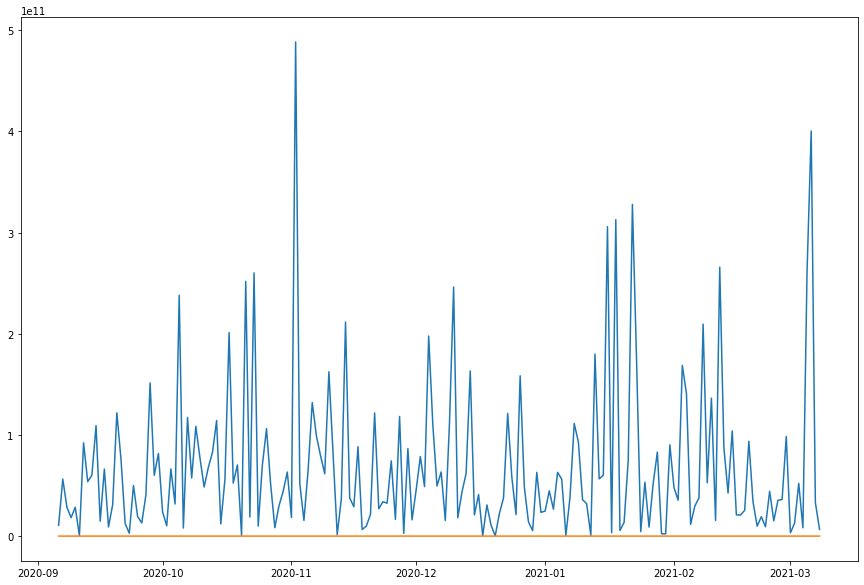

In [72]:
# plt.figure(figsize=(15,10))
# plt.plot(y_test)
# plt.plot(Predict)
# plt.show()

In [ ]:
# Create a data frame to compare Y in train with the prediction of model 

test_vs_pred_df= test.merge(forecast_test, on='ds', how='left')
merged_df
test_vs_pred_df = pd.DataFrame(merged_df[['ds', 'y', 'yhat']]).copy()
test_vs_pred_df['absolute_error'] = abs(test_vs_pred_df['y'] - test_vs_pred_df['yhat'])
test_vs_pred_df